In this section I will be testing out how different types of linear regression work, I will be altering code found at: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-1-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Below I test out polynomial functions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 3, 4, 5 ,6 ])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None]) # This transforms the above array into a 3d array
# Where each value is squared and then cubed

array([[  1.,   1.,   1.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.],
       [  6.,  36., 216.]])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression()) # Make pipeline speeds up the
                           # program by combining processes

Below I tried to make my own pipeline but it didn't work out most likely na issues with model fitting for polynomial

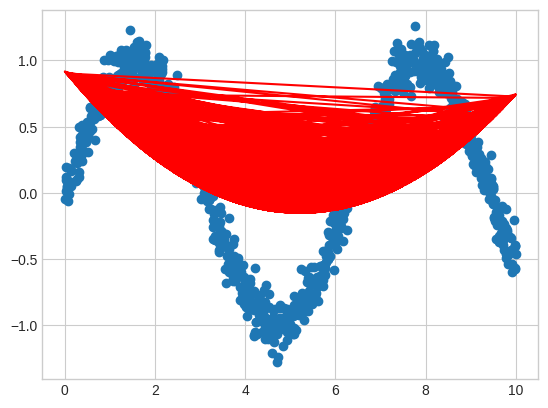

In [109]:
#Below I show what make_pipeline does
rng = np.random.RandomState(12)
x = 10 * rng.rand(1000)
y = np.sin(x) + 0.1 * rng.randn(1000)

poly = PolynomialFeatures(2)
x_fit = poly.fit_transform(x[:,np.newaxis])

model = LinearRegression()
model.fit(x_fit, y)
y_pred = model.predict(x_fit)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red');

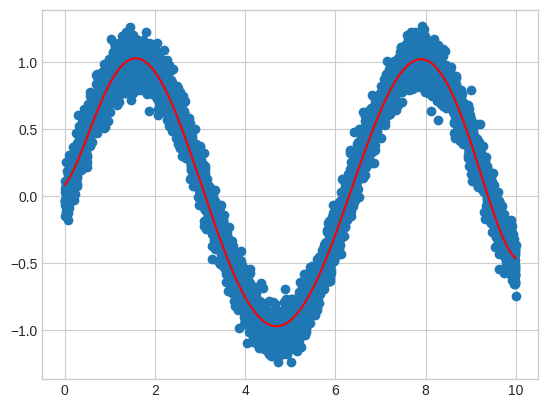

In [64]:
#Here just increased the number of points on the graph
rng = np.random.RandomState(12)
x = 10 * rng.rand(5000)
y = np.sin(x) + 0.1 * rng.randn(5000)

xfit = np.linspace(0, 10, 5000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');

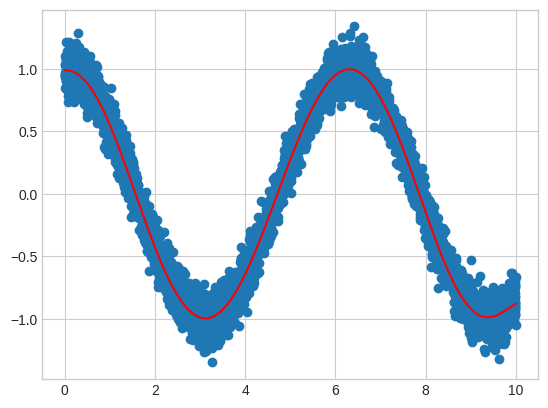

In [98]:
#Here I changed the graph from a sine to a cosine
rng = np.random.RandomState(12)
x = 10 * rng.rand(5000)
y = np.cos(x) + 0.1 * rng.randn(5000)

xfit = np.linspace(0, 10, 5000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');

Below I will be testing out Gaussian Basis Functions

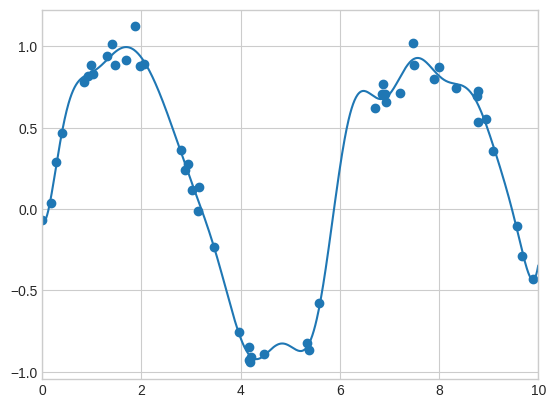

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

Below I will be testing out Regularization

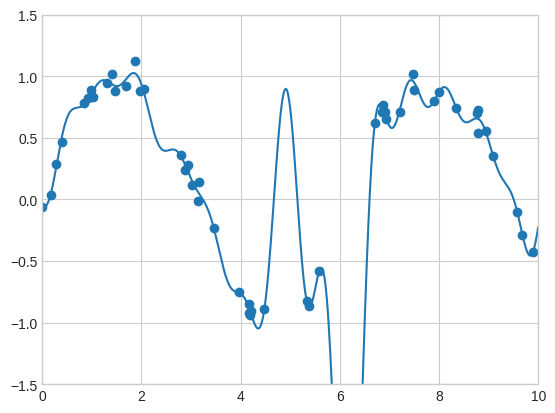

In [ ]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

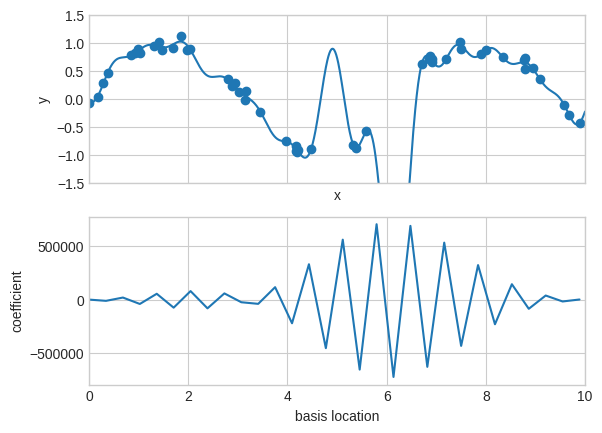

In [ ]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

Below I will be testing out Ridge Regression

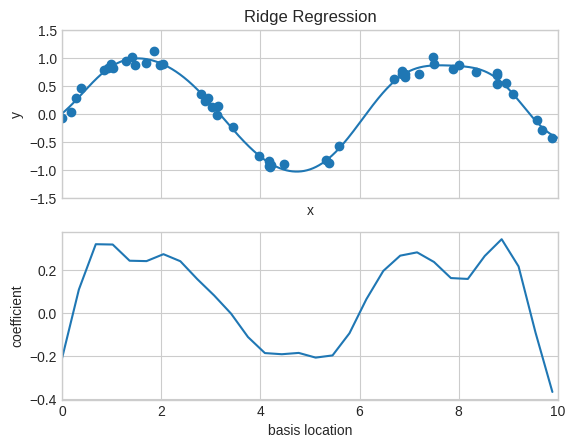

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

Below I will be testing out Lasso Regression

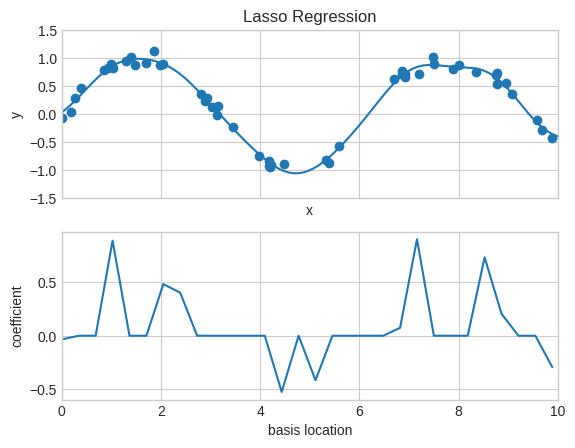

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, max_iter=2000))
basis_plot(model, title='Lasso Regression')